# ANN의 원리

### ANN의 개념
* 은닉계층을 포함하는 인공신경망 기술
* 데이터 양이 많거나 비정형 데이터의 경우 사용

##### 분류 ANN을 위한 인공지능 모델 구현

In [6]:
### 분산 방식 모델형 + 함수형 구현
from keras import layers, models

def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin, )) # 입력계층 : 입력 신호가 Nin개 
    h = layers.Activation('relu')(layers.Dense(Nh)(x)) # 은닉 계층 : 노드가 Nh개, 입력 = x
    y = layers.Activation('softmax')(layers.Dense)(Nout)(h) # 출력 계층 : 출력 노드가 Nout, 입력 = h
    # 모델링
    model = models.Model(x, y)
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [7]:
### 연쇄 방식 모델형 + 함수형 구현

def ANN_seq_func(Nin, Nh, Nout):
     # 모델 설정 후 초기화
    model = models.Sequential()
    # 입력노드 Nin개 → 완전 연결계층 Nh개의 은닉계층
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    # 은닉계층 출력 → 출력이 Nout개인 출력 노드로 이동 → softmax 통과 후 결과 출력 
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [8]:
### 분산 방식 모델링 + 객체 지향형 구현
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        
        x = layers.Input(shape=(Nin, ))
        h = relu(hidden(x))
        y = softmax(output(h))
        
        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
### 연쇄 방식 모델링 + 객체 지향형 구현
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 데이터 불러오기

import numpy as np
from keras import datasets
from keras.utils import np_utils

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)



In [20]:
# 학습 결과 그래프로 구현
import matplotlib.pyplot as plt

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)
    
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)


In [21]:
# 분류 ANN 학습 및 성능 분석

def main():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class
    
    
    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()

    history = model.fit(X_train, Y_train, epochs = 5, batch_size = 100, validation_split = 0.2)
    performace_test = model.evaluate(X_test, Y_test, batch_size = 100)
    print('Test Loss Accuracy : ', performace_test)
    
    plot_loss(history)
    plt.show()
    
    plot_acc(history)
    plt.show()

Epoch 1/5
480/480 [==============================] - 3s 5ms/step - loss: 0.3985 - accuracy: 0.8870 - val_loss: 0.2135 - val_accuracy: 0.9405
Epoch 2/5
480/480 [==============================] - 2s 5ms/step - loss: 0.1891 - accuracy: 0.9456 - val_loss: 0.1598 - val_accuracy: 0.9541
Epoch 3/5
480/480 [==============================] - 3s 6ms/step - loss: 0.1394 - accuracy: 0.9607 - val_loss: 0.1310 - val_accuracy: 0.9634
Epoch 4/5
480/480 [==============================] - 2s 5ms/step - loss: 0.1113 - accuracy: 0.9680 - val_loss: 0.1217 - val_accuracy: 0.9651
Epoch 5/5
100/100 [==============================] - 0s 3ms/step - loss: 0.1049 - accuracy: 0.9692
Test Loss Accuracy :  [0.1049286350607872, 0.9692000150680542]


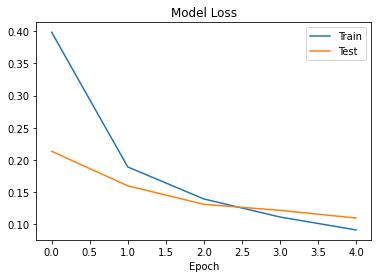

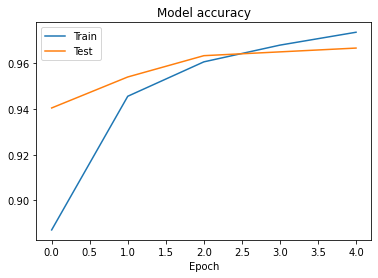

In [22]:
# 코드 실행
# if __name__ == '__main__': 여기서부터의 스크립트를 실행할 거야
# 스크립트 : 도구를 사용하겠다는 명령 vs 라이브러리 : 도구 모음집
if __name__ == '__main__':
    main()

##### 회귀 ANN을 위한 인공지능 모델 구현

In [53]:
from keras import layers, models

class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        
        x = layers.Input(shape=(Nin, ))
        h = relu(hidden(x))
        y = output(h)
        
        super().__init__(x, y)
        
        self.compile(loss='mse', optimizer='sgd')

In [54]:
from keras import datasets
from sklearn import preprocessing

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return (X_train, y_train), (X_test, y_test)

In [55]:
import matplotlib.pyplot as plt

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)
    
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)

In [60]:
import matplotlib.pyplot as plt

def main():
    Nin = 13
    Nh = 5
    Nout = 1
    
    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)
    performace_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest loss : {:.2f}'.format(performace_test))
    
    plot_loss(history)
    plt.show()

Epoch 1/100
4/4 - 0s - loss: 296.5496 - val_loss: 109.7500
Epoch 2/100
4/4 - 0s - loss: 101.0806 - val_loss: 137.1186
Epoch 3/100
4/4 - 0s - loss: 151.5048 - val_loss: 92.0372
Epoch 4/100
4/4 - 0s - loss: 68.9105 - val_loss: 58.9211
Epoch 5/100
4/4 - 0s - loss: 54.3641 - val_loss: 57.2906
Epoch 6/100
4/4 - 0s - loss: 51.0699 - val_loss: 49.9972
Epoch 7/100
4/4 - 0s - loss: 47.0698 - val_loss: 71.7714
Epoch 8/100
4/4 - 0s - loss: 54.6377 - val_loss: 49.5145
Epoch 9/100
4/4 - 0s - loss: 43.4525 - val_loss: 42.4615
Epoch 10/100
4/4 - 0s - loss: 41.9083 - val_loss: 66.3337
Epoch 11/100
4/4 - 0s - loss: 45.4334 - val_loss: 40.9321
Epoch 12/100
4/4 - 0s - loss: 37.0445 - val_loss: 46.5038
Epoch 13/100
4/4 - 0s - loss: 52.5496 - val_loss: 53.8918
Epoch 14/100
4/4 - 0s - loss: 40.2003 - val_loss: 40.5466
Epoch 15/100
4/4 - 0s - loss: 36.7494 - val_loss: 46.7324
Epoch 16/100
4/4 - 0s - loss: 38.9489 - val_loss: 51.4156
Epoch 17/100
4/4 - 0s - loss: 34.4797 - val_loss: 29.7709
Epoch 18/100
4/4 -

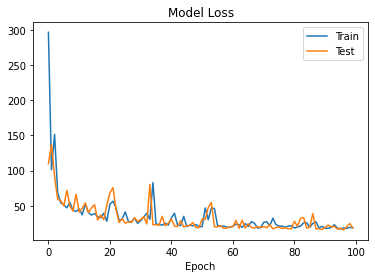

In [61]:
if __name__ == '__main__':
    main()